# Training Phase

We are going to use [tf.keras](https://www.tensorflow.org/guide/keras). tf.keras is a high-level API to build and train models in Tensorflow.

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

c:\users\rheza harliman\appdata\local\programs\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.12.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
num_classes = 10

# input image dimensions
img_rows, img_cols = 28, 28

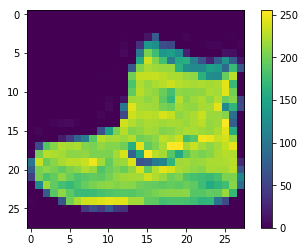

In [5]:
%matplotlib inline

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [6]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [7]:
# model = keras.Sequential([
#     keras.layers.Flatten(input_shape=(28, 28)),
#     keras.layers.Dense(128, activation=tf.nn.relu),
#     keras.layers.Dense(10, activation=tf.nn.softmax)
# ])

In [8]:
train_images = train_images.reshape(train_images.shape[0], img_rows, img_cols, 1)
test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [9]:
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), 
                        activation=tf.nn.relu, 
                        input_shape=input_shape,
                        data_format='channels_last'),
    keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [10]:
model.compile(optimizer="Adadelta", 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
__________

In [12]:
batch_size = 128
epochs = 100

In [13]:
file_writer = tf.summary.FileWriter('logs', tf.keras.backend.get_session().graph)

In [14]:
model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs)

Epoch 1/100
60000/60000 [==============================] - 6s 102us/step - loss: 0.5628 - acc: 0.8017
Epoch 2/100
60000/60000 [==============================] - 5s 82us/step - loss: 0.3599 - acc: 0.8730
Epoch 3/100
60000/60000 [==============================] - 5s 82us/step - loss: 0.3118 - acc: 0.8885
Epoch 4/100
60000/60000 [==============================] - 5s 82us/step - loss: 0.2798 - acc: 0.9006
Epoch 5/100
60000/60000 [==============================] - 5s 82us/step - loss: 0.2553 - acc: 0.9084
Epoch 6/100
60000/60000 [==============================] - 5s 82us/step - loss: 0.2351 - acc: 0.9161
Epoch 7/100
60000/60000 [==============================] - 5s 82us/step - loss: 0.2186 - acc: 0.9210
Epoch 8/100
60000/60000 [==============================] - 5s 83us/step - loss: 0.2074 - acc: 0.9247
Epoch 9/100
60000/60000 [==============================] - 5s 82us/step - loss: 0.1980 - acc: 0.9293
Epoch 10/100
60000/60000 [==============================] - 5s 82us/step - loss: 0.1846 - 

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 68us/step
Test accuracy: 0.9324


In [16]:
# Save entire model to a HDF5 file
model.save('fashion_mnist.h5')